# K-Means Clustering



*   Simplest and most popular unsupervised ML algorithm

*   Objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset

*   A cluster refers to a collection of data points aggregated together because of certain similarities

*   Define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster

*   Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares

*    K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible

*   The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid
\






In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:


*   The centroids have stabilized — there is no change in their values because the clustering has been successful

*   The defined number of iterations has been achieved



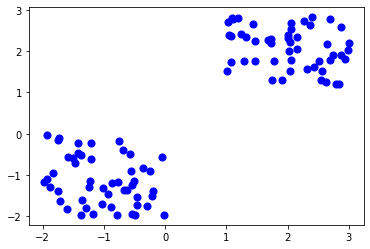

In [ ]:
#random data
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'blue')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2,verbose = 1)
Kmean.fit(X)

Initialization complete
Iteration 0, inertia 116.56688351403207
Iteration 1, inertia 63.886181702413325
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 86.96430677907952
Iteration 1, inertia 63.886181702413325
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 116.60738463649444
Iteration 1, inertia 63.886181702413325
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 150.88668682881627
Iteration 1, inertia 63.886181702413325
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 82.61739779366584
Iteration 1, inertia 63.886181702413325
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 121.84694607740765
Iteration 1, inertia 63.886181702413325
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 111.79973085524972
Iteration 1, inertia 63.88618170241332

KMeans(n_clusters=2, verbose=1)

In [ ]:
# find centroids
Kmean.cluster_centers_


array([[ 2.02186662,  2.08857566],
       [-1.02854141, -1.15047363]])

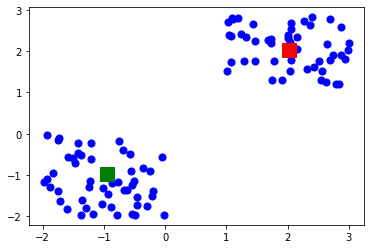

In [ ]:
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'blue')
plt.scatter(-0.94665068, -0.97138368, s=200, c= 'g', marker='s')
plt.scatter(2.01559419, 2.02597093, s=200, c='r', marker='s')
plt.show()

In [ ]:
## check the labels and test
Kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
sample_test=np.array([3.0,3.0])
second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)

array([0], dtype=int32)

Why do we not use it?

## Clustering - Geolocation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, cluster
import scipy

In [ ]:
#obtaining and loading the file
!gdown --id 1vnZWLcKyGkl7-wVwBwND2jHV2Z8I06kX --output latsl.csv
import pandas as pd
dtf = pd.read_csv('latsl.csv')

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1vnZWLcKyGkl7-wVwBwND2jHV2Z8I06kX
To: /content/latsl.csv
100% 11.1M/11.1M [00:00<00:00, 53.8MB/s]


In [ ]:
dtf = dtf.drop(dtf.columns[[0]], axis=1)

In [ ]:
dtf.head(5)

,latitude,longitude
0,87.333294,144.484409
1,-22.605420,143.376342
2,-43.531545,-78.595627
3,-50.787744,-8.422739
4,-49.270064,-62.172244


In [ ]:
dtf.round(2)

,latitude,longitude
0,87.33,144.48
1,-22.61,143.38
2,-43.53,-78.60
3,-50.79,-8.42
4,-49.27,-62.17
...,...,...
249995,61.70,-115.33
249996,-62.29,160.90
249997,-1.65,27.33
249998,-62.36,5.45


1
2
3
4
5
6
7
8
9
10


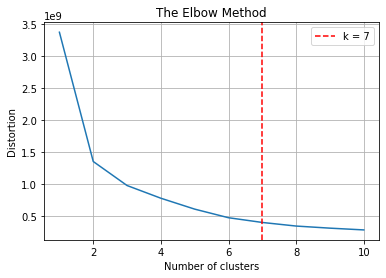

In [ ]:
#using the elbow method to find the optimal number of clusters

#Other than elbow method, we could also try Page Rank and other algorithms

X = dtf[["latitude","longitude"]]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       print(i)
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [ ]:
#model with k=7
k = 7
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = dtf[["latitude","longitude"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
dtf[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
dtf.sample(5)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,latitude,longitude,cluster,centroids
24124,71.768162,-158.325200,6,0
45611,-6.462665,117.889151,1,0
40748,43.546253,5.592675,5,0
39618,22.339262,151.839737,3,0
68403,-43.029279,69.100076,1,0


/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


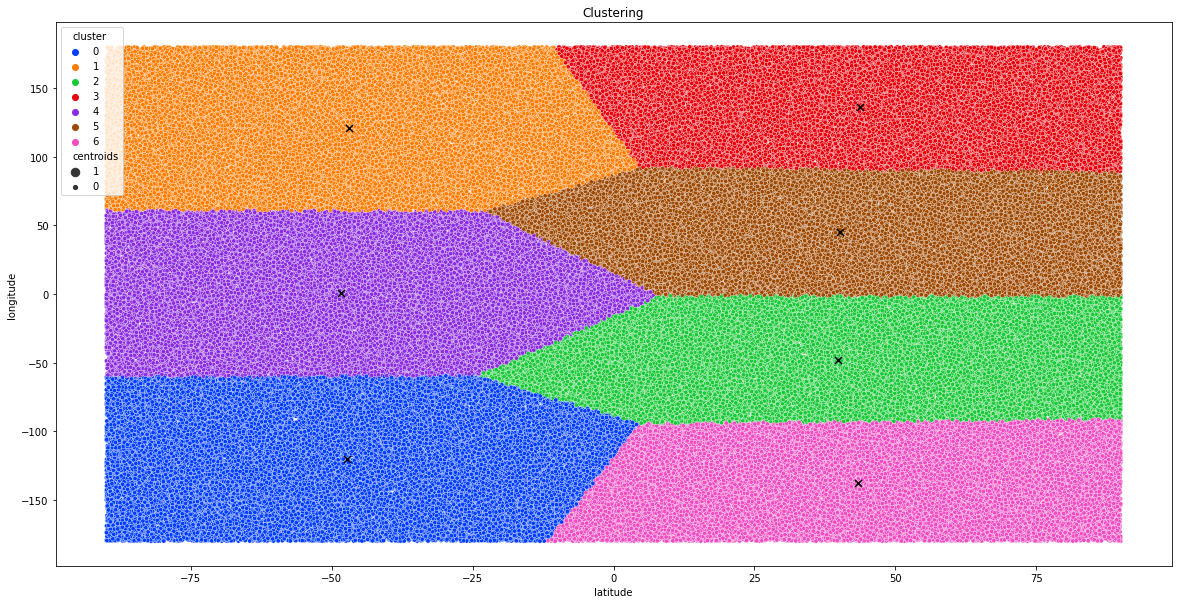

In [ ]:
## plot
fig, ax = plt.subplots(figsize=(20,10))
sns.scatterplot(x="latitude", y="longitude", data=dtf, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="x")

In [ ]:
#using affinity propogation to find clusters
model = cluster.AffinityPropagation()
#som -- minisom

Text(0.5, 1.0, 'Clustering')

/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


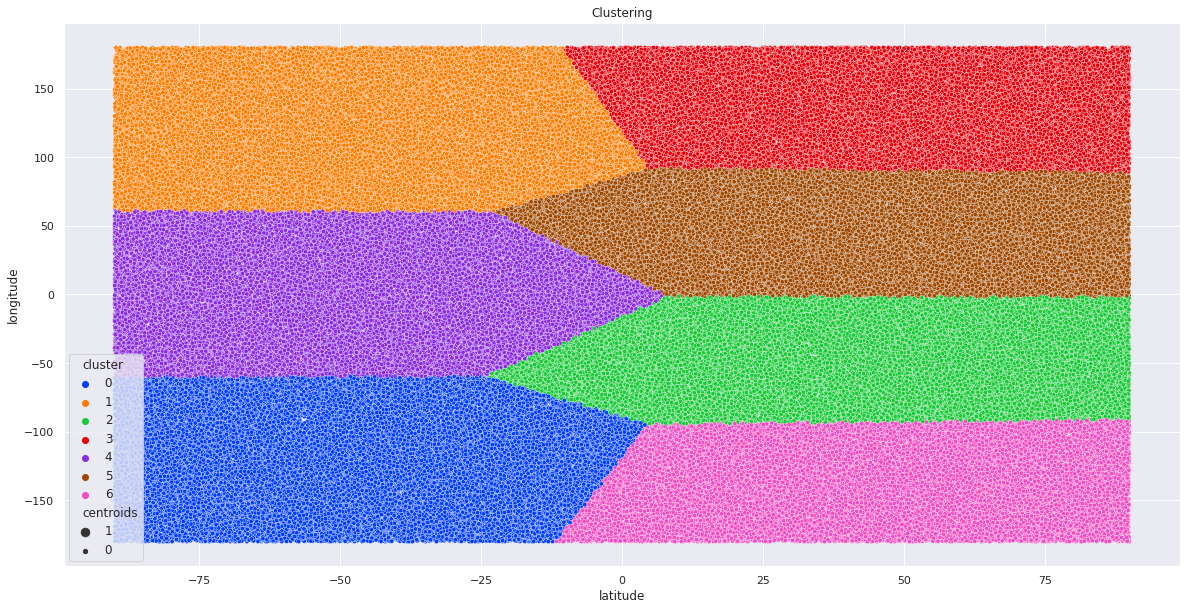

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
k = dtf["cluster"].nunique()
sns.scatterplot(x="latitude", y="longitude", data=dtf, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief").set_title('Clustering')